# Parallel epsilon-greedy bandits

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn
from joblib import Parallel, delayed

In [4]:
k = 2
bandits = 2000
pulls = 20000
epsilon = 0.1

5.87409026552
CPU times: user 1.64 s, sys: 596 ms, total: 2.23 s
Wall time: 1min 45s


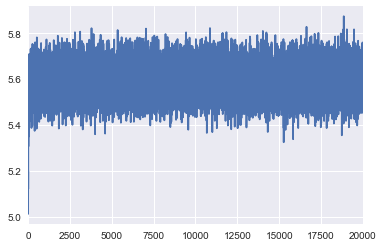

In [5]:
%%time

def run_bandit():
    average_rewards = np.zeros(pulls)
    q_star = np.random.normal(5, 1, k)
    values = np.zeros(k)
    counts = np.zeros(k)

    for p in range(pulls):
        if np.random.uniform() <= epsilon:
            arm = np.random.choice(range(k))
        else:
            arm = np.argmax(values)

        # Play that arm
        reward = np.random.normal(q_star[arm], 1)
        counts[arm] += 1

        # Update
        values[arm] += (1 / counts[arm]) * (reward - values[arm])
        average_rewards[p] = reward

    return average_rewards

results = [Parallel(n_jobs=-1)(delayed(run_bandit)()
                               for _ in range(bandits))]
results = np.vstack(results[0])
print(results.mean(axis=0).max())
pd.Series(results.mean(axis=0)).plot()